# Video Game Analysis (Project 1)

### What is the problem?
The video game industry is huge and growing fast, making billions of dollars every year. But not all games sell the same, and their success depends on things like the platform they’re on, the region they’re released in, their genre, and their publisher. Developers, publishers, and marketers need to understand these trends to make smart choices about creating and selling games. The big question is: **What makes a game successful?** By looking at sales data across different platforms, and regions, we can find patterns that help explain why some games sell better than others. Throughout this data set there are ways to help identify specific patterns and hints as to why games do better. Below we are going to explore 3 questions that in my opinion help answer the overarching question mentioned above.

### Questions we are trying to answer?

1. **What is the the total number of sales in parts of the world by each publisher?**
2. **How has global sales of video games changed over the years?**
3. **Which platform has the highest total global sales?**


### What Data are We Looking At?
I picked a video game data set for this project because gaming is one of my favorite ways to unwind There is a lot of valuable information in this data set that can show us some patterns and trends. The information for the data set was found at [**Video Game Data Set**](https://www.kaggle.com/datasets/gregorut/videogamesales).
### Specific Information About the Dataset:
The video game data set has **16660** games that were released between **1980** to **2020** and includes **11 columns** of specific data entries. These include the following columns:
- World rank
- Game name
- Platform
- Release year
- Genre
- Publisher
- Sales (in millions) in North America
- Sales (in millions) in Europe
- Sales (in millions) in Japan
- Sales (in millions) in all other regions
- Total worldwide sales

### Why does this data/problem matter?
- This data can show what types of games are popular in different areas, which could help game companies make better decisions about what to develop and where to market their games.
- It also helps in understanding how many copies games typically sell, which is useful for business planning.
- Helps game developers decide what genre they should focus their development on to better enhance their respective companies success in the market.
- One downside is that it groups a lot of countries together under 'Rest of the World,' so we lose some detail there in specific places in the world.
- Also, the sales numbers are rounded, which might not be super accurate, especially when talking about millions of copies sold.
- As well, this data ends in 2020, and the way gaming and the digital era of it has changed dramatically from how it was done in the past.

##  All the Code I used to do my pre-processing. Below is how I ensured that I had the proper extensions necessary to make sure that data being used was properly and able to be read. This includes doing pre-processing, visualizations, and any other python necessary for this project.

In [7]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [8]:
import pandas as pd

### Below I imported the vgsales.csv (video game sales) and used the df.head() function to ensure that the data worked after it was imported in Juypter notebooks.

In [9]:
df = pd.read_csv("vgsales.csv")

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Basic info about variable types and column names that the dataset has.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Below is the commands to check the amount of cells in the data that have null types. There are some in the year and publisher. Therefore, I made sure that I removed the rows that had a null value. I did this because it could possibly skew the visualizations and patterns that could be identified the more and more we dove into the data.

In [19]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [21]:
dataclean_df = df.dropna()

In [23]:
dataclean_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Checking if there are duplicates in the data which there is not. As you can see after running the code, there is not any duplicates in the data set therefore not skewing the data.

In [25]:
print("There are", dataclean_df.duplicated().sum(), "of duplicates found in the data")

There are 0 of duplicates found in the data


### Ensured that I imported the numpy and matplotlib to make sure that I could create proper visualizations.

In [29]:
import matplotlib.pyplot as plt
import numpy as np

### I created a bar chart showing the difference in amount of sales by each of the companies throughout the regions (US, EU, JP, Other). 

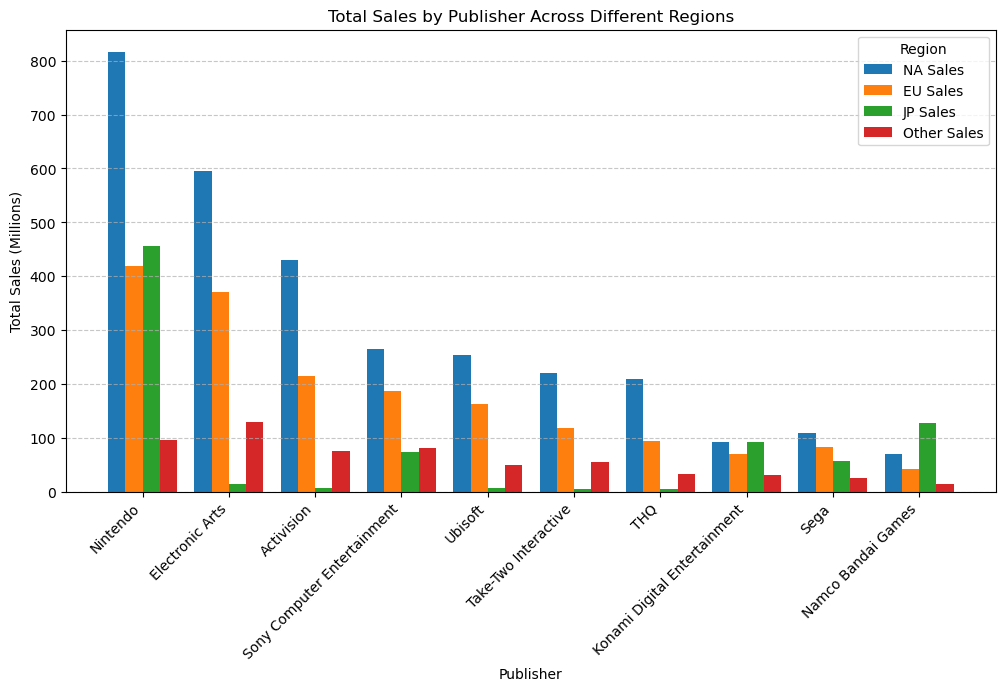

In [31]:
publisher_sales = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

publisher_sales["Total_Sales"] = publisher_sales.sum(axis=1)
publisher_sales = publisher_sales.sort_values(by="Total_Sales", ascending=False).drop(columns=["Total_Sales"]).head(10)

bar_width = 0.2 
x = np.arange(len(publisher_sales))  

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * bar_width, publisher_sales["NA_Sales"], width=bar_width, label="NA Sales")
plt.bar(x - 0.5 * bar_width, publisher_sales["EU_Sales"], width=bar_width, label="EU Sales")
plt.bar(x + 0.5 * bar_width, publisher_sales["JP_Sales"], width=bar_width, label="JP Sales")
plt.bar(x + 1.5 * bar_width, publisher_sales["Other_Sales"], width=bar_width, label="Other Sales")

plt.xticks(ticks=x, labels=publisher_sales.index, rotation=45, ha="right")
plt.xlabel("Publisher")
plt.ylabel("Total Sales (Millions)")
plt.title("Total Sales by Publisher Across Different Regions")
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## Findings from Graph 1:
I decided to create a bar chart that showed all the different regions that specific publishers were selling games. They are broken into 4 different categories, North America (NA), Europe (EU), Japan (JP), and Other Sales. Each region is color coded to make the graph and visualization more easily digestible. There were a few things that stood out to me after I created this graph. 

- After visualizing the data, it is clear that the different game publishers succeed in different parts of the world. For example, Nintendo is bar far the biggest selling company throughout the entire world, especially in North America.
- Other companies such as Electronic Arts (EA) and Activision do well mainly in North America, however their sales significantly lack in Japan.
- Overall the "Other Sales" category is almost always lower than the main regions, meaning these publishers seem to only have access to smaller markets and people.
- Japanese publishers like Namco Bandai & Konami rely heavily on their home market which is Japan, while the majority of Western based publishers struggle there.

**Assessment** Based off these fact patterns/trends, it suggests that people choose specific publishers based on where they live. This leads back to the original questions - *what makes a game successful?* and that where the game is developed plays a huge role in if it is bought by consumers. Publishers must think about their audience when they are developing specific types of games. They must figure out how to appeal to different regions if these publishers want to increase sale and their influence in other markets. In the future if companies understand and change the way they produce and market games, there could be a alteration in publishers doing well in regions that they don't today.

### I create a line chart that showed the comparison of global video games sales over the years. 

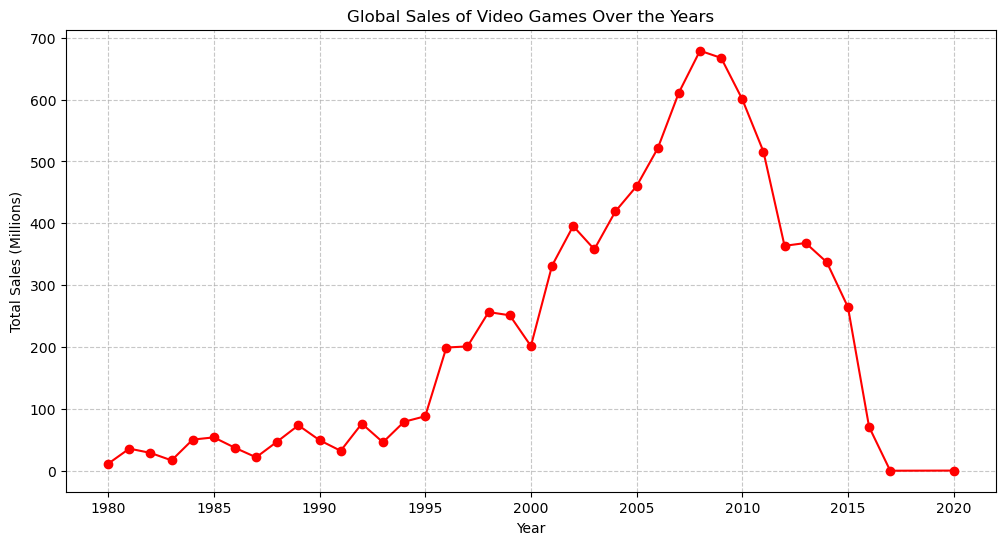

In [33]:

yearly_sales = df.groupby("Year")["Global_Sales"].sum().dropna()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker="o", linestyle="-", color="red")

plt.title("Global Sales of Video Games Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales (Millions)")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


## Findings from Graph 2:
For my second graph I decided to create a line chart to show how the total of sales had increase of the years that the data had been collected. There seems to be a clear pattern as the years kind of progress with an equal amount of technological advancements happening in the gaming industry that correspond to these increases in sales of games. Some trends and patterns that I noticed while looking at this graph.

- During the 1980's - 1995, there seems to be sort of a standard pattern of small jumps then back down. If we take a look at the creation of new gaming technologies, this is when they were first being developed and primarily being revolutionized to appeal to more consumers.
- Between the late 1990's to the early 2000, we see the biggest peak of total global sales ever. After that, the number of sales started to drop fast.
- During the fall after what I like to call the "boom" of buy video games based of this chart, we see a severe decline in purchases.

**Assessment**: This chart helps us answer the over arching question of *what makes a game successful*. We can do that using this graph by showing the trend of how games were being produced. Now, based of the data I think its kind of unfair to say that between roughly 2016-2020 there were no purchases at all in the global market. I think that this data set might only be showing physical game purchases, where in the time of everything becoming digital, people are purchasing more games on their actual gaming systems. Also, people might be deciding to get free-to-play and mobile games as the ability to play video games on more personal devices, such as cell phones, and hand held gaming platforms such as a Nintendo Switch or PSP. Companies that are using this data must realize buying "physical" copies may be out of style. The days of people waiting in line at midnight at a Gamestop to get the first copies of a game may be in our past. They must look at this data and understand that times are changing and to keep a foot in the market they must adapt to the new times of video gaming.

### I created a bar chart that showed the amount of sales in millions by the type of platform that the game was sold on.

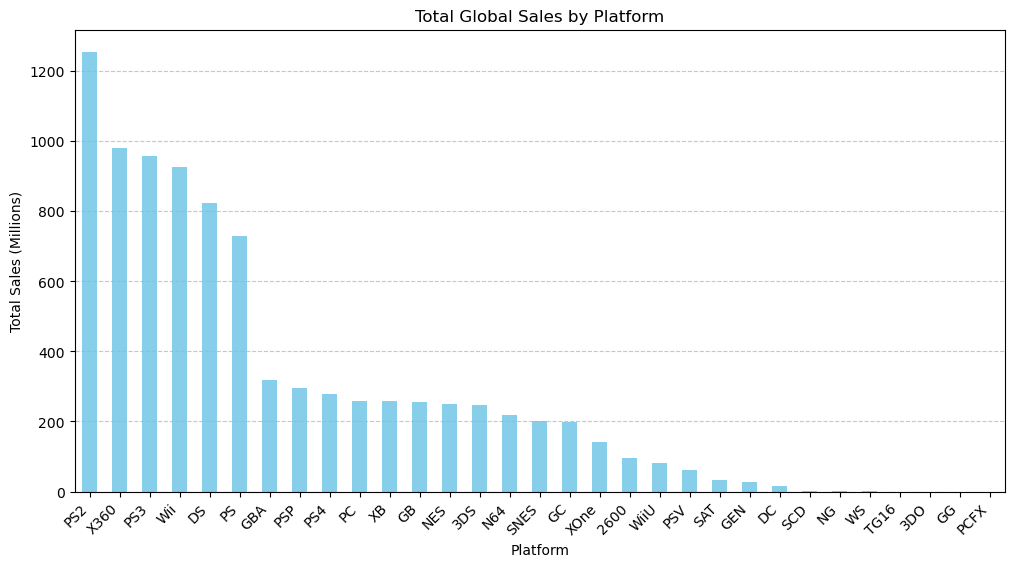

In [35]:

platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
platform_sales.plot(kind="bar", color="skyblue")

plt.title("Total Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Findings from Graph 3:
For my third graph, I decided to create a bar chart to show the total global sales of video games across the different gaming platforms. This shows the amount of sales in games that each system had over the entirety of its lifespan. However, it is clear to note that some of the newer systems such as the PS5 and Xbox Series X, some of Microsoft's and Playstation's new systems aren't on here. This is because the data ends in 2020, before these new platforms had emerged. Besides some of the bias and issues that come with

- The PlayStation 2 (PS2) had the highest total sales of any platform, which makes sense given that it was one of the longest-running and most widely adopted gaming consoles. This system (which I owned) was known for the amount of access to gaming libraries and games that were produced by all the publishers.
- Following the PS2, we see that Xbox 360 (X360), PlayStation 3 (PS3), and Nintendo Wii (Wii) had very high total sales as well. These became either upgrades or newer systems by Microsoft that were being developed to counter the demand for Playstation's gaming platforms.
- The Nintendo DS (DS) and PlayStation (PS1) also saw very high global sales. The DS was a revolutionary handheld gaming system that allowed users to bring their games with them on the go.

**Assessment:** This graph helps answer the question of what makes a gaming platform successful by showing which systems had the highest global sales. Based on the data, it seems that the most successful gaming consoles were the ones that either had long-lasting popularity, strong game libraries, or introduced innovative new ways to play. However, it's important to note that this dateset might primarily focus on physical game sales. This could create some bias misrepresentation on what the actual numbers mean. Also, it doesnt have any of the newer systems that came out after this. In more recent years, digital sales have become dominant, meaning that consoles like the PS5, Xbox Series X, and Nintendo Switch might not show their full impact here. Companies looking at this data must realize that the gaming industry is shifting towards digital purchases and subscriptions, and physical game sales alone might not tell the full story anymore.

## References
### Panda Cheat Sheet
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
  
### Python Environment Cheatsheet
- https://cheatography.com/ilyes64/cheat-sheets/python-virtual-environments/
  
### In-Class Demo
- Demo 1 - Pandas and Visualizations.ipynb

## Final Observations/Impact

As we started this journey with some understanding of how gaming platforms and publishers work, I think that we overall learned quite a bit. From the start, we must understand that this data set isnt fully up to date. It goes from 1980-2020, which leaves now 5 years of data we are missing. There could be significant changes in our patterns and trends that we have identified as we completed this project. Some of these trends and patterns are:

- We have noticed that it seems that overall big publishers tend to have the biggest amount of sales in more westernized countries. This could be for many reasons based of the genre that they are selling, the amount of access users have to the games and platforms, or marketing strategies. However, smaller companies such as the ones in Japan have higher sales to their specific country they are in.
- There was a significant change in the purchasing of games between the late 1990's and early 2000's. As we look into the history of gaming, this was a significant period of innovation and technological advancements that allowed everyone to use these systems. Also, making them smaller, and more portables opened the door for companies to broaden their span of game development.
- Finally, there were definitely gaming systems that grabbed the attention of users over others. This could be based off being one of the first of their kind, having a longer lasting support system from the publisher allowing for use longer, or a more variety of games that could be played on said systems.

As we look back at the original problem we were trying to find **"Why are games successful**,  I think we were able to get some insight on to why. These included affordability to the consumer, the ability to find and purchase these items, and also the bigger market areas that companies were able to get into and spread their influence in. I think that all the questions, visualizations, and assessments were able to tie in all of it together and show that there are key things on why these games are successful, whether its here in North America or in other countries that gaming isnt as popular.